Signal Yield: 11245.18 ± 141.12
Background Yield: 24.82 ± 11.13
Background Slope: -0.01 ± 0.00
Chi-squared: 140.64
Degrees of Freedom: 113
Chi-squared per dof: 1.24


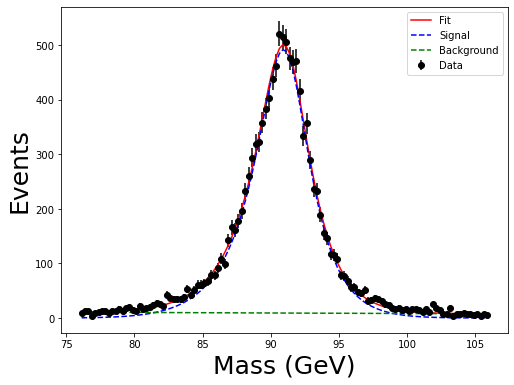

error value saved to eN_2Ibb9.txt
value saved to N_2Ibb9.txt


In [3]:
###best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_BB_hist9;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()

with open("eN_2Ibb9.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_2Ibb9.txt")
with open("N_2Ibb9.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_2Ibb9.txt")

Signal Yield: 9622.39 ± 122.74
Background Yield: 21.79 ± 9.75
Background Slope: -0.01 ± 0.00
Chi-squared: 124.59
Degrees of Freedom: 113
Chi-squared per dof: 1.10


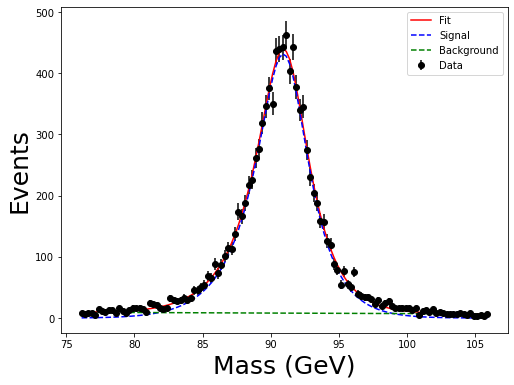

error value saved to eN_2Ibb10.txt
value saved to N_2Ibb10.txt


In [4]:
###best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_BB_hist10;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_2Ibb10.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_2Ibb10.txt")
with open("N_2Ibb10.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_2Ibb10.txt")

Signal Yield: 8016.73 ± 105.13
Background Yield: 19.36 ± 9.29
Background Slope: -0.01 ± 0.01
Chi-squared: 108.47
Degrees of Freedom: 113
Chi-squared per dof: 0.96


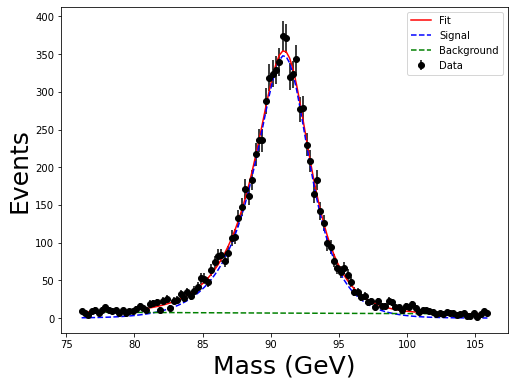

error value saved to eN_2Ibb11.txt
value saved to N_2Ibb11.txt


In [5]:
###best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_BB_hist11;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_2Ibb11.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_2Ibb11.txt")
with open("N_2Ibb11.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_2Ibb11.txt")

Signal Yield: 2710.18 ± 113.17
Background Yield: 403.17 ± 390.59
Background Slope: -0.04 ± 0.01
Chi-squared: 76.83
Degrees of Freedom: 53
Chi-squared per dof: 1.45


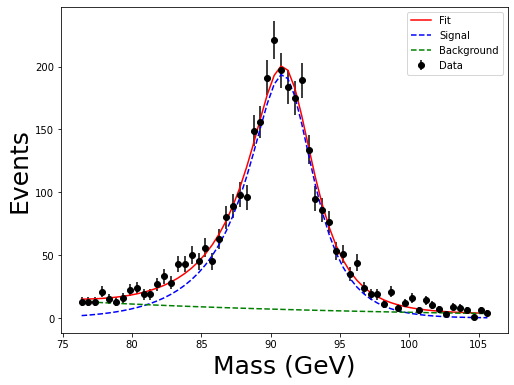

error value saved to eN_1Ibb9.txt
value saved to N_1Ibb9.txt


In [6]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_BB_hist9;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values

# Re-bin the data to 60 bins
new_bin_count = 60
new_hist_values, new_hist_edges = np.histogram(
    x_data, bins=new_bin_count, weights=y_data
)
x_data = (new_hist_edges[:-1] + new_hist_edges[1:]) / 2  # Bin centers
y_data = new_hist_values
y_errors = np.sqrt(y_data)  # Recalculate errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 6.5, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_1Ibb9.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_1Ibb9.txt")
with open("N_1Ibb9.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_1Ibb9.txt")

Signal Yield: 2177.75 ± 76.95
Background Yield: 11.38 ± 11.12
Background Slope: -0.01 ± 0.01
Chi-squared: 137.86
Degrees of Freedom: 113
Chi-squared per dof: 1.22


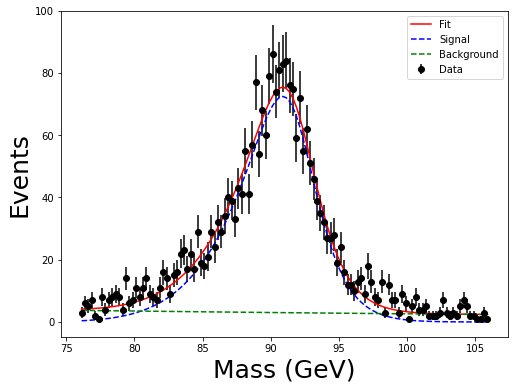

error value saved to eN_1Ibb10.txt
value saved to N_1Ibb10.txt


In [7]:
###best and final 1 ###

import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_BB_hist10;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_1Ibb10.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_1Ibb10.txt")
with open("N_1Ibb10.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_1Ibb10.txt")

Signal Yield: 1837.55 ± 76.78
Background Yield: 124.31 ± 107.87
Background Slope: -0.03 ± 0.01
Chi-squared: 67.97
Degrees of Freedom: 53
Chi-squared per dof: 1.28


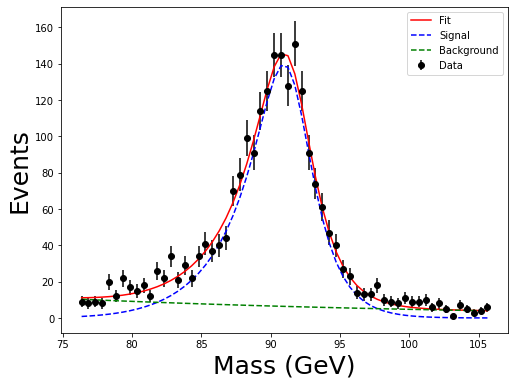

error value saved to eN_1Ibb11.txt
value saved to N_1Ibb11.txt


In [8]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_BB_hist11;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values

# Re-bin the data to 60 bins
new_bin_count = 60
new_hist_values, new_hist_edges = np.histogram(
    x_data, bins=new_bin_count, weights=y_data
)
x_data = (new_hist_edges[:-1] + new_hist_edges[1:]) / 2  # Bin centers
y_data = new_hist_values
y_errors = np.sqrt(y_data)  # Recalculate errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.5, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass (GeV)" , fontsize=25)
plt.ylabel("Events" , fontsize=25)
plt.legend()
plt.show()
with open("eN_1Ibb11.txt", "w") as file:
    file.write(f"{sig_yield_error}\n")
    print("error value saved to eN_1Ibb11.txt")
with open("N_1Ibb11.txt", "w") as file:
    file.write(f"{sig_yield}\n")
    print("value saved to N_1Ibb11.txt")

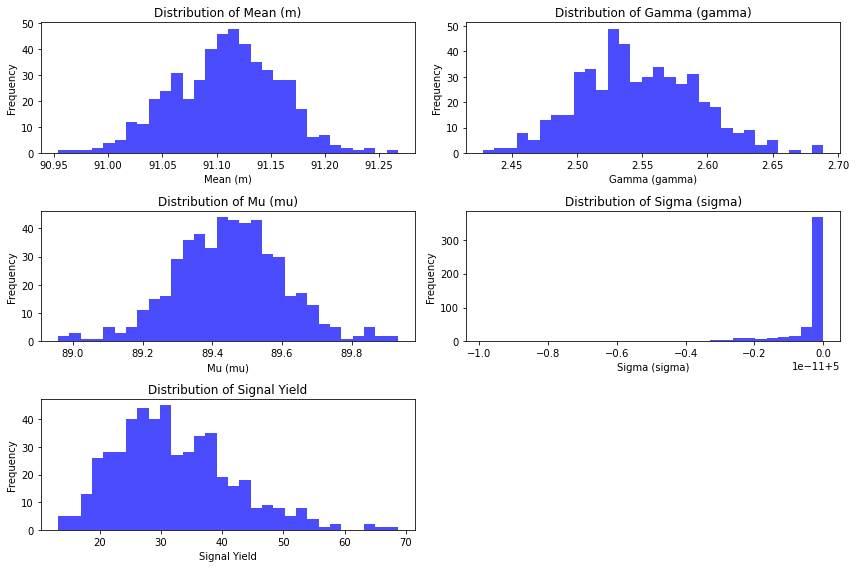

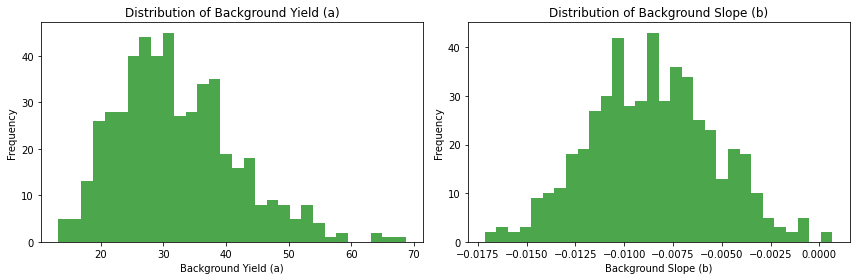

In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_BB_hist9;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Plotting histograms for each fit parameter
# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue
        
        
signal_params = np.array(signal_params)
background_params = np.array(background_params)


# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mean (m)", "Gamma (gamma)", "Mu (mu)", "Sigma (sigma)", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()



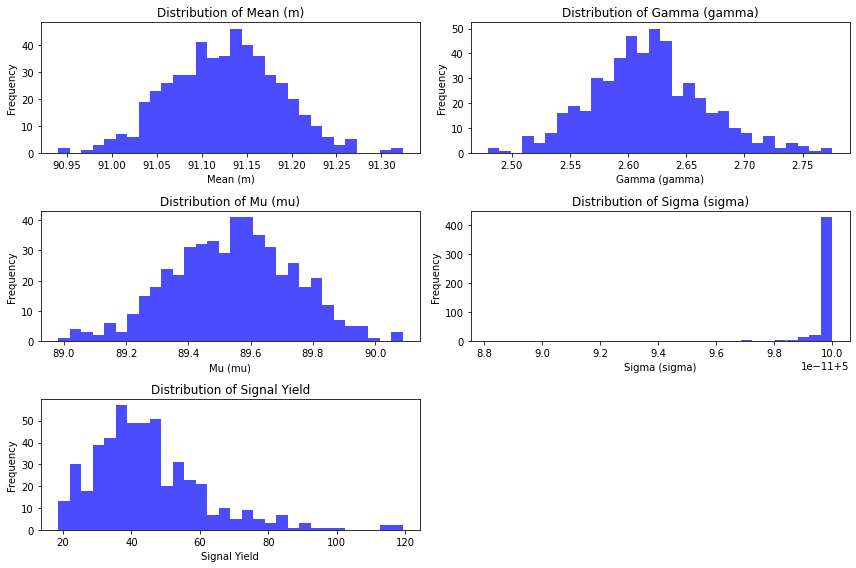

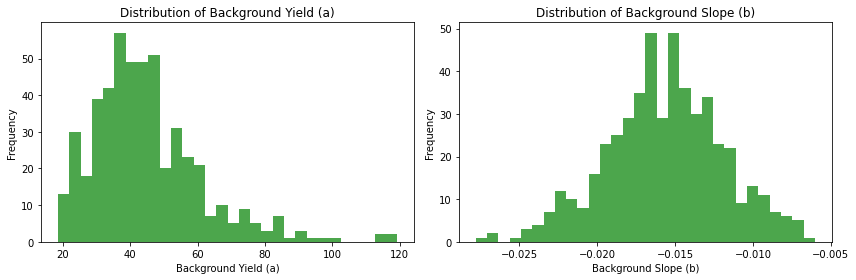

In [2]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_2idpass_BB_hist10;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Plotting histograms for each fit parameter
# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue
        
        
signal_params = np.array(signal_params)
background_params = np.array(background_params)


# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mean (m)", "Gamma (gamma)", "Mu (mu)", "Sigma (sigma)", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()



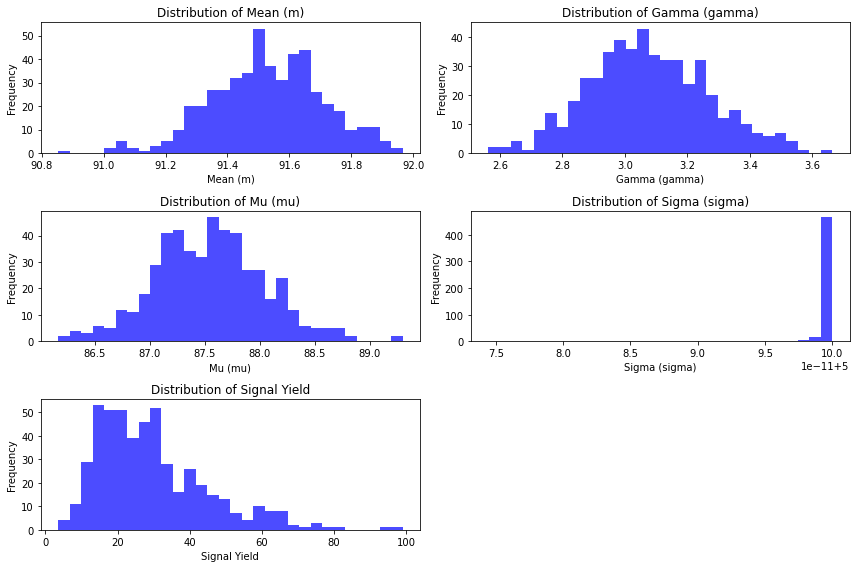

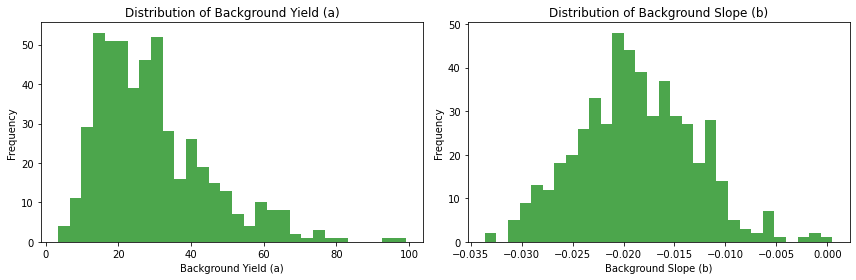

In [4]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_BB_hist10;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values
y_errors = np.sqrt(y_data)  # Assume Poisson statistics for errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Plotting histograms for each fit parameter
# Number of bootstrap iterations
n_bootstrap = 500

# Arrays to store fitted parameters
signal_params = []  # For signal-related parameters (m, gamma, mu, sigma, sig_yield)
background_params = []  # For background-related parameters (a, b)

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Generate a resampled histogram with replacement
    resampled_y_data = np.random.poisson(y_data)  # Resample assuming Poisson statistics

    try:
        # Fit the resampled data
        popt_resampled, _ = curve_fit(
            fit_function, x_data, resampled_y_data, p0=initial_params, sigma=y_errors, bounds=bounds
        )
        
        # Store signal parameters
        signal_params.append(popt_resampled[:5])  # m, gamma, mu, sigma, sig_yield
        
        # Store background parameters
        background_params.append(popt_resampled[4:6])  # a, b
    
    except RuntimeError:
        # Skip fits that fail to converge
        continue
        
        
signal_params = np.array(signal_params)
background_params = np.array(background_params)


# Plotting signal parameter distributions
plt.figure(figsize=(12, 8))
signal_labels = ["Mean (m)", "Gamma (gamma)", "Mu (mu)", "Sigma (sigma)", "Signal Yield"]
for i, param in enumerate(signal_labels):
    plt.subplot(3, 2, i + 1)
    plt.hist(signal_params[:, i], bins=30, color='blue', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

# Plotting background parameter distributions
plt.figure(figsize=(12, 4))
background_labels = ["Background Yield (a)", "Background Slope (b)"]
for i, param in enumerate(background_labels):
    plt.subplot(1, 2, i + 1)
    plt.hist(background_params[:, i], bins=30, color='green', alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {param}")
plt.tight_layout()
plt.show()

